In [1]:
!pip install --force-reinstall scikit-learn==1.3.2 imbalanced-learn==0.12.0 joblib==1.3.2 scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 58.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 52.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
   

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='R1s3MBD8V3q1pv2MECz493KiQDfmYGR-Zg0RBoXEz_9m',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'networkintrusiondetection2-donotdelete-pr-llwnnkwktah8m8'
object_key = 'Train_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt



df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Dataset Shape:
(25192, 42)

Attack Type Distribution:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


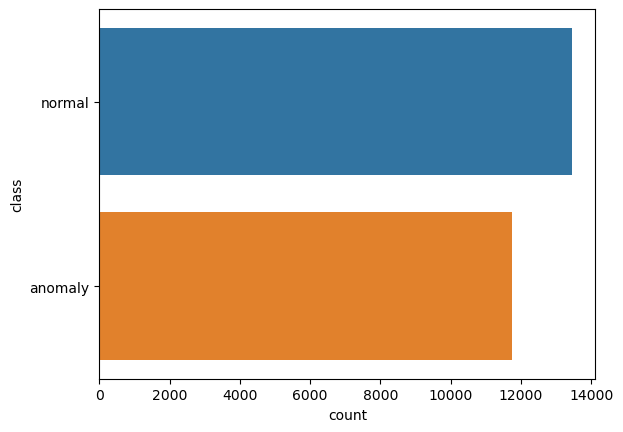

In [7]:

print("Dataset Shape:")
print(df.shape)

print("\nAttack Type Distribution:")

print(df['class'].value_counts())

sns.countplot(y=df['class'])
plt.show()

categorical_features = ['protocol_type', 'service', 'flag']

numerical_features = [col for col in df.columns if col not in categorical_features + ['class']]


X = df.drop('class', axis=1)
y = df['class']


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)

In [9]:

print("Class distribution before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
class
normal     10759
anomaly     9394
Name: count, dtype: int64

Class distribution after SMOTE:
class
normal     10759
anomaly    10759
Name: count, dtype: int64


Classification Report:
              precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      2349
      normal       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

Confusion Matrix:


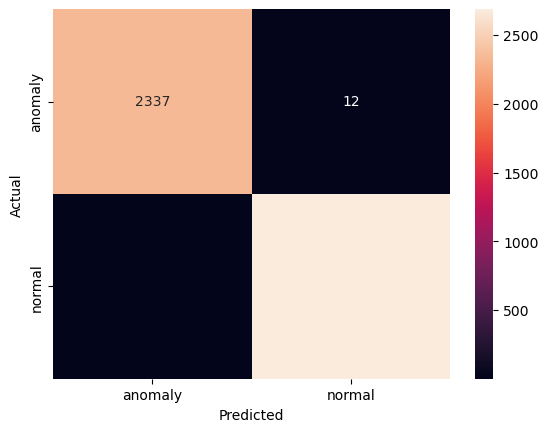

In [10]:

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_processed)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', model)])


final_pipeline.fit(X_train, y_train)

!pip install -U ibm-watson-machine-learning

from ibm_watson_machine_learning import APIClient


api_key = '2nrUcrK9bzJW_UZ1d0YyX45YRYvK8snXekf8WUyT4Y4o'
project_id = '5e19fa13-3c4a-487e-b68b-c83f07f2aaa2'

wml_credentials = {
    "apikey": api_key,
    "url": "https://eu-gb.ml.cloud.ibm.com" # Use the URL for your region
}

client = APIClient(wml_credentials)
client.set.default_project(project_id)

software_spec_uid = client.software_specifications.get_id_by_name("runtime-24.1-py3.11") # Or the one you are using

metadata = {
    client.repository.ModelMetaNames.NAME: 'NIDS_RandomForest_Pipeline',
    # This is the new, correct model type
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.3',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

stored_model_details = client.repository.store_model(
    model=final_pipeline,
    meta_props=metadata,
    training_data=X_train, # provide training data and label
    training_target=y_train
)

In [16]:

test_sample_dict = X_test.iloc[[5]].to_dict(orient='records')[0]
print(test_sample_dict)

{'duration': 0, 'protocol_type': 'tcp', 'service': 'http', 'flag': 'SF', 'src_bytes': 212, 'dst_bytes': 1197, 'land': 0, 'wrong_fragment': 0, 'urgent': 0, 'hot': 0, 'num_failed_logins': 0, 'logged_in': 1, 'num_compromised': 0, 'root_shell': 0, 'su_attempted': 0, 'num_root': 0, 'num_file_creations': 0, 'num_shells': 0, 'num_access_files': 0, 'num_outbound_cmds': 0, 'is_host_login': 0, 'is_guest_login': 0, 'count': 3, 'srv_count': 15, 'serror_rate': 0.33, 'srv_serror_rate': 0.13, 'rerror_rate': 0.0, 'srv_rerror_rate': 0.07, 'same_srv_rate': 1.0, 'diff_srv_rate': 0.0, 'srv_diff_host_rate': 0.4, 'dst_host_count': 7, 'dst_host_srv_count': 255, 'dst_host_same_srv_rate': 1.0, 'dst_host_diff_srv_rate': 0.0, 'dst_host_same_src_port_rate': 0.14, 'dst_host_srv_diff_host_rate': 0.03, 'dst_host_serror_rate': 0.14, 'dst_host_srv_serror_rate': 0.02, 'dst_host_rerror_rate': 0.0, 'dst_host_srv_rerror_rate': 0.0}
